In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_row', 100)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()

plt.rc('font', family=font)
sns.set(font=font,
        rc={"axes.unicode_minus":False}, 
        style='darkgrid')

---

# 데이터 전처리

In [4]:
df17 = pd.read_csv('competitions/test2017.csv',sep=',',index_col=0)
df18 = pd.read_csv('competitions/test2018.csv',sep=',',index_col=0)
df19 = pd.read_csv('competitions/test2019.csv',sep=',',index_col=0)
df20 = pd.read_csv('competitions/test2020.csv',sep=',',index_col=0)
df21 = pd.read_csv('competitions/test2021.csv',sep=',',index_col=0)

In [5]:
print(f'    df17       df18       df19       df20       df21  \n', 
      df17.shape, df18.shape, df19.shape, df20.shape, df21.shape)

    df17       df18       df19       df20       df21  
 (8760, 31) (8760, 31) (8448, 31) (8784, 31) (8760, 31)


### 2019년은 결측치가 있는 듯 하다.
### 2020년은 2.29 하루에 의해 8784개(시간) 데이터

In [6]:
df_total = pd.concat([df17,df18,df19,df20,df21]) 
df_total.reset_index(drop=True,inplace=True)
#df_total.info()

In [7]:
df_total['기준일ID'] = df_total['기준일ID'].astype('str')
df_total['기준일ID'] = pd.to_datetime(df_total['기준일ID'])
df_total['year'] = df_total['기준일ID'].dt.year
df_total['month'] = df_total['기준일ID'].dt.month
df_total['day'] = df_total['기준일ID'].dt.day

In [8]:
df_total = df_total[['기준일ID','year','month','day','시간대구분','총생활인구수']]
df_total.rename(columns={'시간대구분':'hour'},inplace=True)

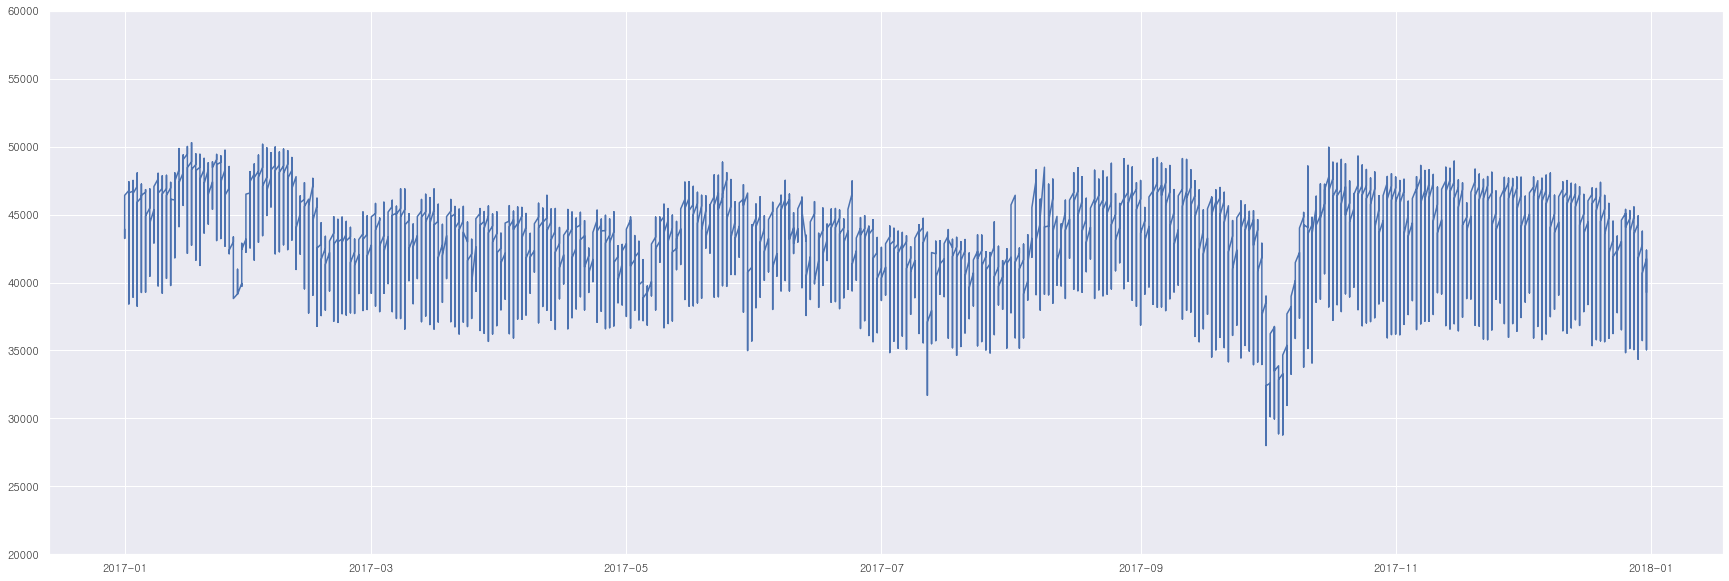

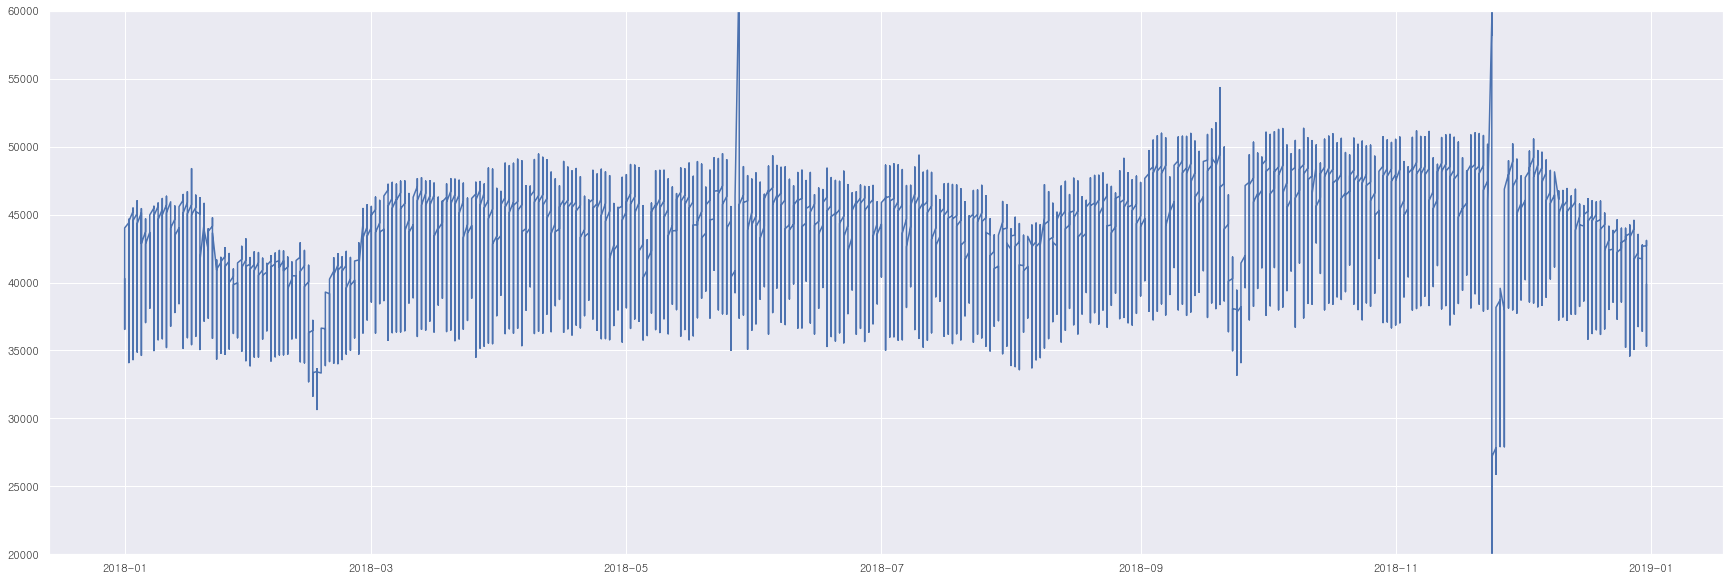

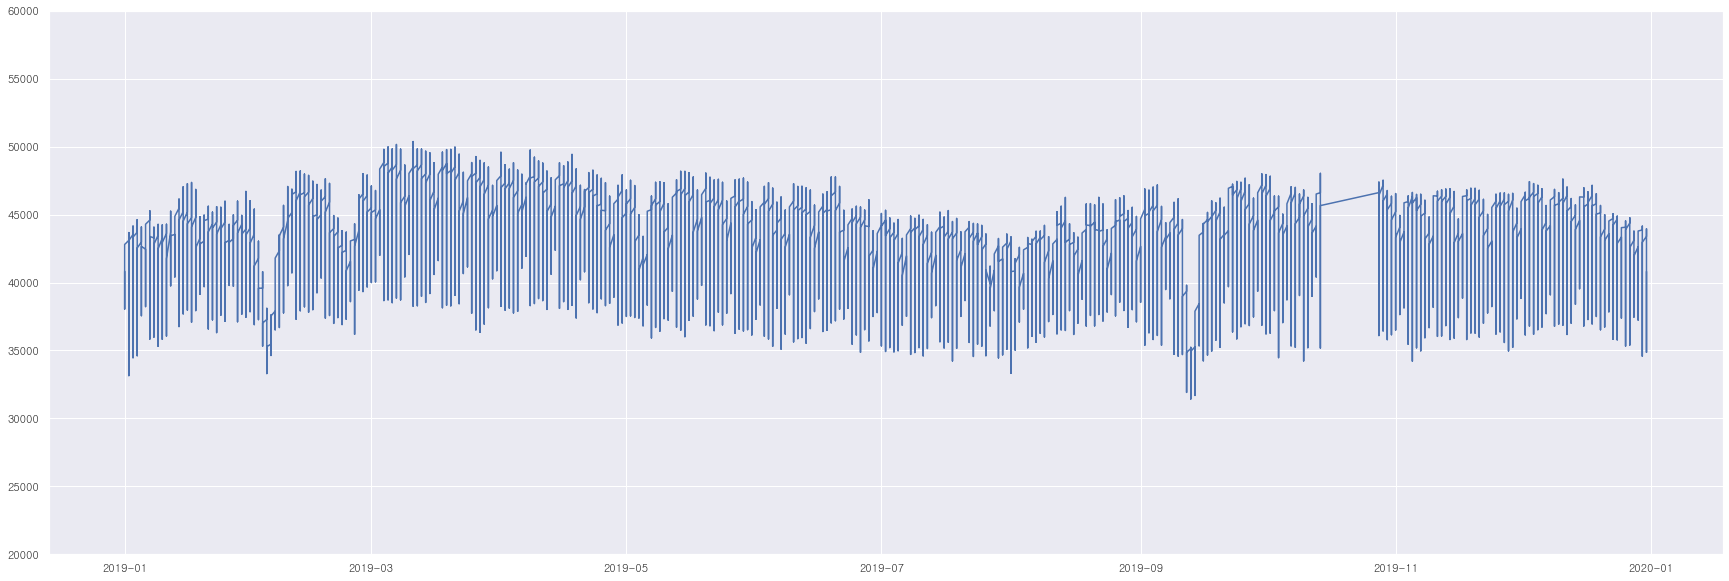

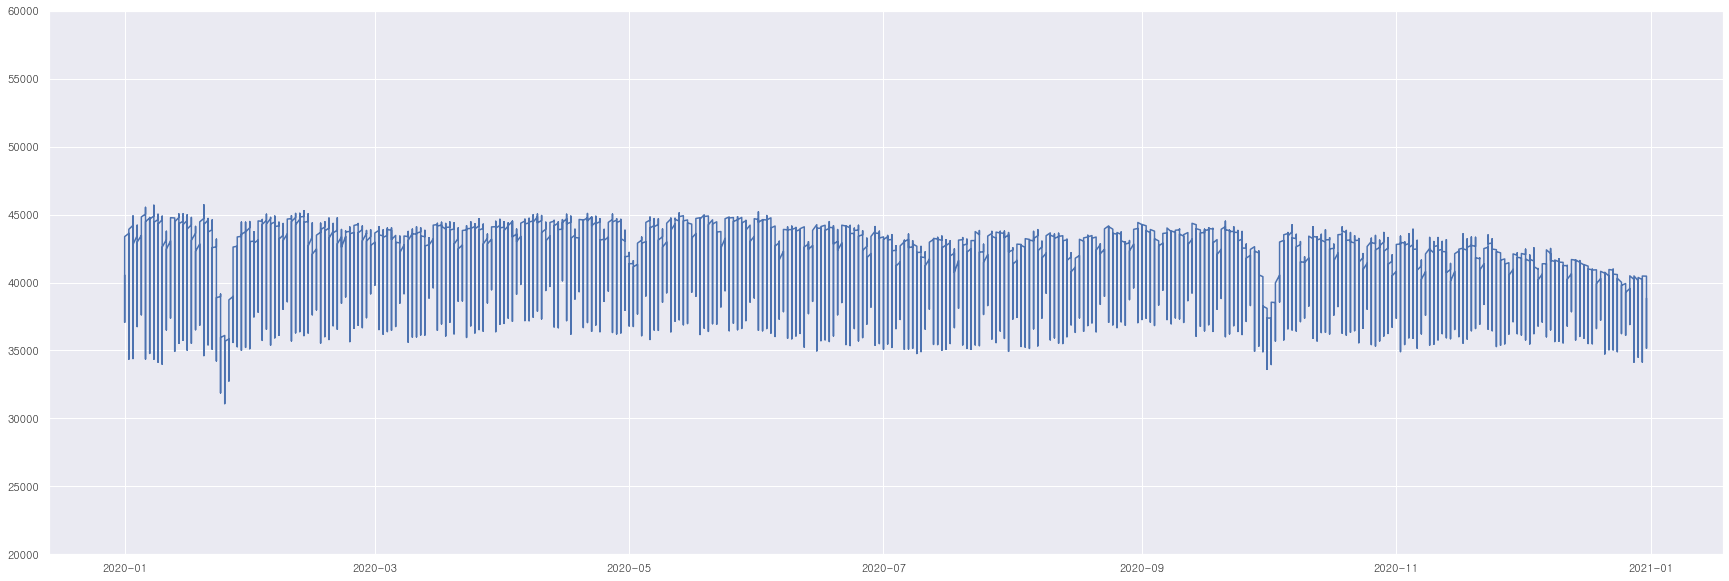

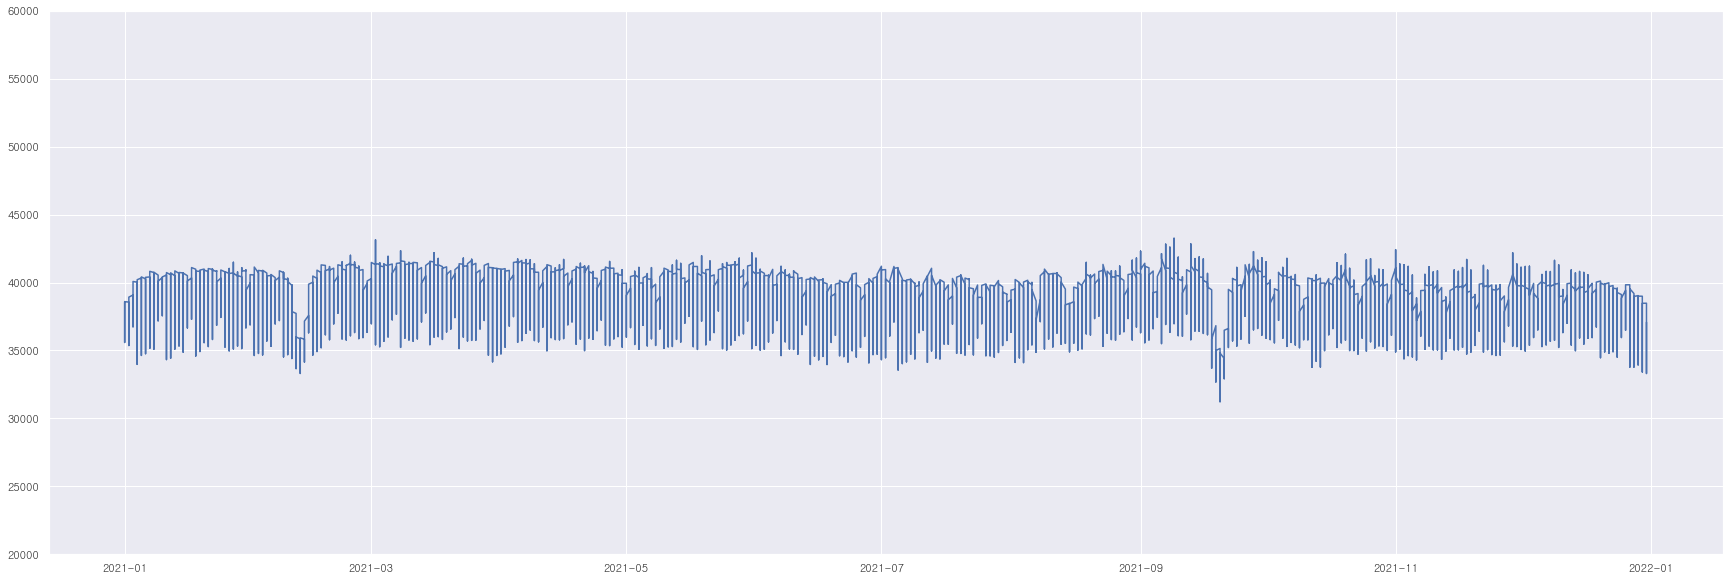

In [9]:
for i in range(5):
    tmp = df_total[(df_total['year'] == 2017 + i)]  
    plt.figure(figsize=(30,10))
    plt.ylim(20000,60000)
    plt.plot(tmp['기준일ID'],tmp['총생활인구수'])

### P1) 18년도 5 ~ 6월 이상치 발견
### P2) 18년도 11 ~ 12월 이상치 발견
### P3) 19년도 10월에서 빈값 발견

In [10]:
df18['기준일ID'] = df18['기준일ID'].astype('str')
df18['기준일ID'] = pd.to_datetime(df18['기준일ID'])
df18['year'] = df18['기준일ID'].dt.year
df18['month'] = df18['기준일ID'].dt.month
df18['day'] = df18['기준일ID'].dt.day

df18 = df18[['기준일ID','year','month','day','시간대구분','총생활인구수']]
df18.rename(columns={'시간대구분':'hour'},inplace=True)

In [11]:
df19['기준일ID'] = df19['기준일ID'].astype('str')
df19['기준일ID'] = pd.to_datetime(df19['기준일ID'])
df19['year'] = df19['기준일ID'].dt.year
df19['month'] = df19['기준일ID'].dt.month
df19['day'] = df19['기준일ID'].dt.day

df19 = df19[['기준일ID','year','month','day','시간대구분','총생활인구수']]
df19.rename(columns={'시간대구분':'hour'},inplace=True)

---

### A1) 18년도 이상치 처리

In [12]:
tmp = df_total[(df_total['year'] == 2018) 
               & (df_total['month']>4) & (df_total['month']<7)
              & (df_total['총생활인구수']>50000)
              ]  
tmp

,기준일ID,year,month,day,hour,총생활인구수
12288,2018-05-28,2018,5,28,0,63617.1539
12289,2018-05-28,2018,5,28,1,60824.1057
12290,2018-05-28,2018,5,28,2,59523.8251
12291,2018-05-28,2018,5,28,3,57725.0319
12292,2018-05-28,2018,5,28,4,59344.6535
12293,2018-05-28,2018,5,28,5,56618.2613
12294,2018-05-28,2018,5,28,6,53720.5494
12295,2018-05-28,2018,5,28,7,51162.2843


### a. 2018-05-28 기준 별다른 시사 이슈가 없었음. 
### b. 0~7 새벽 시간대에 생활인구가 급격히 증가할 별도의 요인은 없다고 판단
### 
### → 이상치가 맞다고 판단 

In [13]:
# 18.05.28 0~7 결측치 처리
# 다른 년도의 해당 시간별 평균 인구를 계산
# 임시 데이터 프레임 생성
ex_tmp = pd.DataFrame()

for k in range(8):  # 시간
    mean = 0
    for i in range(5):   # 년도
        if i != 1:
            df_tmp = df_total[(df_total['year'] == 2017 + i) 
                              & (df_total['month'] == 5)
                             & (df_total['day'] == 28)
                             & (df_total['hour'] == k)
                             ]
            ex_tmp= pd.concat([ex_tmp,df_tmp],sort=False)

ex_tmp.sort_values(['기준일ID','hour'],inplace=True)
ex_tmp

,기준일ID,year,month,day,hour,총생활인구수
3528,2017-05-28,2017,5,28,0,44135.5858
3529,2017-05-28,2017,5,28,1,44179.5931
3530,2017-05-28,2017,5,28,2,44489.1742
3531,2017-05-28,2017,5,28,3,44736.3166
3532,2017-05-28,2017,5,28,4,44780.5134
3533,2017-05-28,2017,5,28,5,44951.6412
3534,2017-05-28,2017,5,28,6,44953.4142
3535,2017-05-28,2017,5,28,7,45007.0521
21048,2019-05-28,2019,5,28,0,46031.5213
21049,2019-05-28,2019,5,28,1,46246.3970


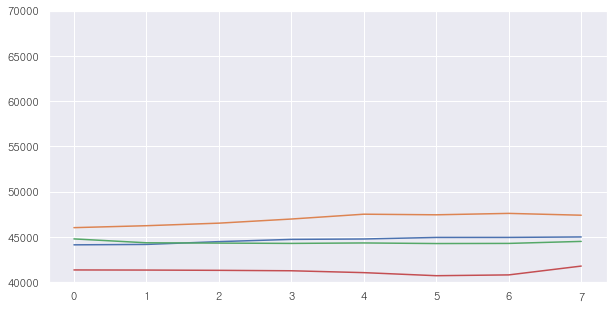

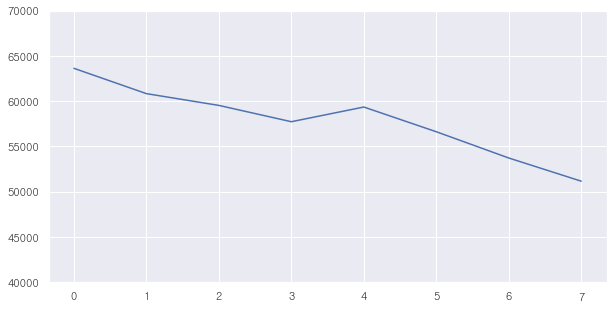

In [14]:
plt.figure(figsize=(10,5))
plt.ylim(40000,70000)
for i in range(8):
    if i != 1:
        plt_tmp = ex_tmp[(ex_tmp['year'] == 2017 + i)]  
        plt.plot(plt_tmp['hour'],plt_tmp['총생활인구수'])
        
plt.figure(figsize=(10,5))
plt.ylim(40000,70000)
plt.plot(tmp['hour'],tmp['총생활인구수'])

In [15]:
tmp = df_total[(df_total['year'] == 2018) 
                      & (df_total['month'] == 5)
                     &  (df_total['day'] >= 27) &  (df_total['day'] <= 29)
                     ]

tmp

,기준일ID,year,month,day,hour,총생활인구수
12264,2018-05-27,2018,5,27,0,40862.1186
12265,2018-05-27,2018,5,27,1,41183.8292
12266,2018-05-27,2018,5,27,2,41711.9145
12267,2018-05-27,2018,5,27,3,42090.8266
12268,2018-05-27,2018,5,27,4,42279.9843
12269,2018-05-27,2018,5,27,5,43381.3031
12270,2018-05-27,2018,5,27,6,43280.1738
12271,2018-05-27,2018,5,27,7,43552.7625
12272,2018-05-27,2018,5,27,8,43223.6096
12273,2018-05-27,2018,5,27,9,43061.2503


### 기존에 데이터와 비슷한 추세를 띄지도 않고, 근사값도 아니여서,
### 기존 데이터의 평균으로 데이터를 대체

In [16]:
ex_tmp = pd.DataFrame()

for k in range(8):  # 시간
    mean = 0
    for i in range(5):   # 년도
        if i != 1:
            df_tmp = df_total[(df_total['year'] == 2017 + i) 
                              & (df_total['month'] == 5)
                             & (df_total['day'] == 28)
                             & (df_total['hour'] == k)
                             ]
            mean = mean + float(df_tmp['총생활인구수'])
    mean = mean/4
    tmp1 = pd.DataFrame([[20180000+500+28,2018,5,28,k,mean]], 
                        columns=['기준일ID','year','month','day','hour','총생활인구수'])
    ex_tmp= pd.concat([ex_tmp,tmp1],sort=False)

ex_tmp

,기준일ID,year,month,day,hour,총생활인구수
0,20180528,2018,5,28,0,44080.081700
0,20180528,2018,5,28,1,44034.687700
0,20180528,2018,5,28,2,44166.165625
0,20180528,2018,5,28,3,44321.645800
0,20180528,2018,5,28,4,44426.773225
0,20180528,2018,5,28,5,44352.100425
0,20180528,2018,5,28,6,44417.201000
0,20180528,2018,5,28,7,44679.235750


In [17]:
ex_tmp['기준일ID'] = ex_tmp['기준일ID'].astype('str')
ex_tmp['기준일ID'] = pd.to_datetime(ex_tmp['기준일ID'])
ex_tmp

,기준일ID,year,month,day,hour,총생활인구수
0,2018-05-28,2018,5,28,0,44080.081700
0,2018-05-28,2018,5,28,1,44034.687700
0,2018-05-28,2018,5,28,2,44166.165625
0,2018-05-28,2018,5,28,3,44321.645800
0,2018-05-28,2018,5,28,4,44426.773225
0,2018-05-28,2018,5,28,5,44352.100425
0,2018-05-28,2018,5,28,6,44417.201000
0,2018-05-28,2018,5,28,7,44679.235750


In [18]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43512 entries, 0 to 43511
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   year    43512 non-null  int64         
 2   month   43512 non-null  int64         
 3   day     43512 non-null  int64         
 4   hour    43512 non-null  int64         
 5   총생활인구수  43512 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 2.0 MB


In [19]:
df_total.loc[12288:12295]

,기준일ID,year,month,day,hour,총생활인구수
12288,2018-05-28,2018,5,28,0,63617.1539
12289,2018-05-28,2018,5,28,1,60824.1057
12290,2018-05-28,2018,5,28,2,59523.8251
12291,2018-05-28,2018,5,28,3,57725.0319
12292,2018-05-28,2018,5,28,4,59344.6535
12293,2018-05-28,2018,5,28,5,56618.2613
12294,2018-05-28,2018,5,28,6,53720.5494
12295,2018-05-28,2018,5,28,7,51162.2843


In [20]:
# 인덱스 12288~12295
for i in range(8) :
    df_total.drop(index=[12288+i],inplace=True)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43504 entries, 0 to 43511
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43504 non-null  datetime64[ns]
 1   year    43504 non-null  int64         
 2   month   43504 non-null  int64         
 3   day     43504 non-null  int64         
 4   hour    43504 non-null  int64         
 5   총생활인구수  43504 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 2.3 MB


In [21]:
df_total = pd.concat([df_total, ex_tmp],sort=False)
df_total.sort_values(['year','month','day'],inplace=True)
df_total

,기준일ID,year,month,day,hour,총생활인구수
0,2017-01-01,2017,1,1,0,43922.2281
1,2017-01-01,2017,1,1,1,43763.4929
2,2017-01-01,2017,1,1,2,43561.5708
3,2017-01-01,2017,1,1,3,43928.9929
4,2017-01-01,2017,1,1,4,44150.2973
...,...,...,...,...,...,...
43507,2021-12-31,2021,12,31,19,33304.5400
43508,2021-12-31,2021,12,31,20,33368.7201
43509,2021-12-31,2021,12,31,21,34083.1721
43510,2021-12-31,2021,12,31,22,34380.0806


---

### A2) 18년도 11 ~ 12월 이상치 처리

In [22]:
tmp = df_total[(df_total['year'] == 2018) 
               & (df_total['month']>= 11) & (df_total['month'] <=12)
              ]  
tmp

,기준일ID,year,month,day,hour,총생활인구수
16056,2018-11-01,2018,11,1,0,47952.3763
16057,2018-11-01,2018,11,1,1,48746.7460
16058,2018-11-01,2018,11,1,2,49187.9075
16059,2018-11-01,2018,11,1,3,49467.3656
16060,2018-11-01,2018,11,1,4,50531.9882
...,...,...,...,...,...,...
17515,2018-12-31,2018,12,31,19,35974.2000
17516,2018-12-31,2018,12,31,20,36108.7995
17517,2018-12-31,2018,12,31,21,36469.3489
17518,2018-12-31,2018,12,31,22,37407.7591


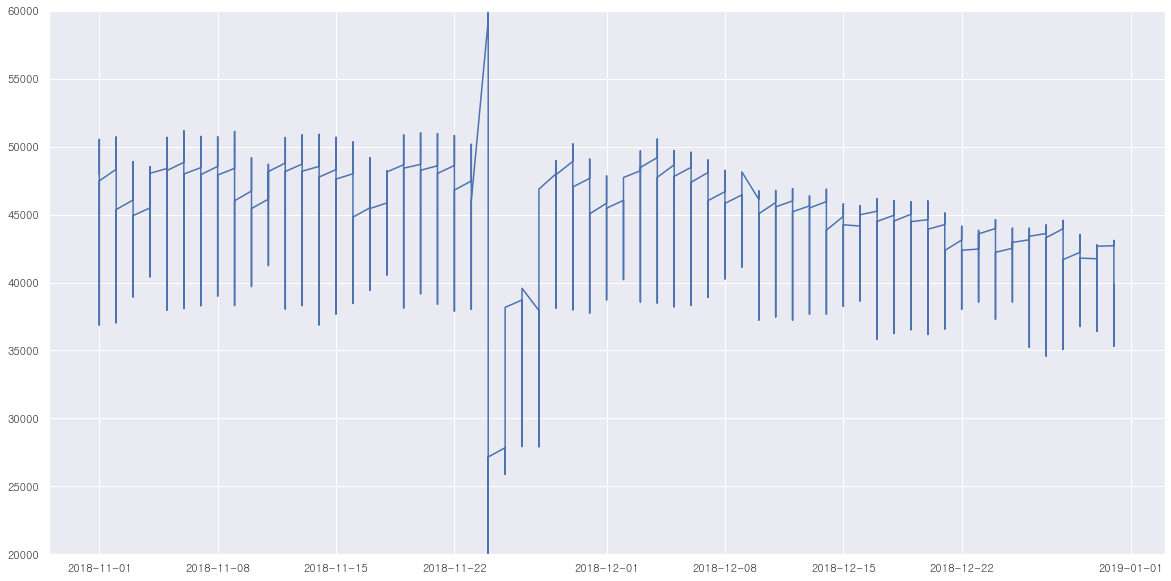

In [23]:
plt.figure(figsize=(20,10))
plt.ylim(20000,60000)
plt.plot(tmp['기준일ID'],tmp['총생활인구수'])

In [24]:
tmp1 = tmp[(tmp['month'] == 11) & (tmp['day'] >= 21) & (tmp['day'] <= 28)]
tmp1

,기준일ID,year,month,day,hour,총생활인구수
16536,2018-11-21,2018,11,21,0,48589.0021
16537,2018-11-21,2018,11,21,1,49197.4266
16538,2018-11-21,2018,11,21,2,49581.8368
16539,2018-11-21,2018,11,21,3,49734.2067
16540,2018-11-21,2018,11,21,4,50863.1439
...,...,...,...,...,...,...
16723,2018-11-28,2018,11,28,19,38988.6480
16724,2018-11-28,2018,11,28,20,39881.0402
16725,2018-11-28,2018,11,28,21,40860.1343
16726,2018-11-28,2018,11,28,22,42655.7132


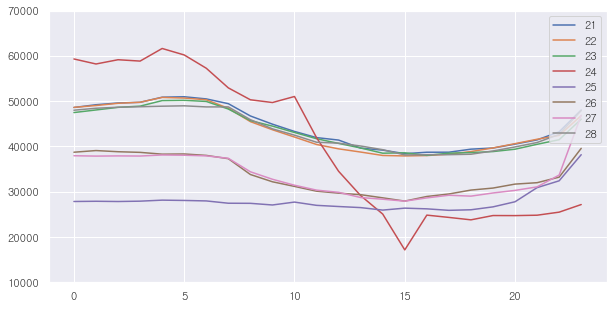

In [25]:
plt.figure(figsize=(10,5))
plt.ylim(10000,70000)
for i in range(8):
    plt_tmp = tmp1[(tmp1['day'] == 21 + i)]  
    plt.plot(plt_tmp['hour'],plt_tmp['총생활인구수'],label=21+i)
    plt.legend(loc='upper right')

### 24일 혼자 뒤죽박죽 큼    (토)
### 25일 혼자 작음    (일)
### 26, 27일은 21 ~ 23일, 28일과 같이 비슷한 추세를 따르지만 그 값이 더 작음 (평일)
---
## 따라서
### A2-1) 24일은 모든 년도에 대하여 평균 값으로 대체.
### A2-2) 25일은 같은 달 다른 일요일과 비교 후 판단
### A2-3) 26일, 27일은 일정 수치를 더하여 주변 평일과 비슷한 값을 갖도록 만듦
---

### A2-1) 24일은 모든 년도에 대하여 평균 값으로 대체.

In [26]:
ex_tmp = pd.DataFrame()

for k in range(24):  # 시간
    mean = 0
    for i in range(5):   # 년도
        if i != 1:
            df_tmp = df_total[(df_total['year'] == 2017 + i) 
                              & (df_total['month'] == 11)
                             & (df_total['day'] == 24)
                             & (df_total['hour'] == k)
                             ]
            mean = mean + float(df_tmp['총생활인구수'])
    mean = mean/4
    tmp1 = pd.DataFrame([[20180000+1100+24,2018,11,24,k,mean]], 
                        columns=['기준일ID','year','month','day','hour','총생활인구수'])
    ex_tmp= pd.concat([ex_tmp,tmp1],sort=False)

#ex_tmp

In [27]:
ex_tmp['기준일ID'] = ex_tmp['기준일ID'].astype('str')
ex_tmp['기준일ID'] = pd.to_datetime(ex_tmp['기준일ID'])

In [28]:
tmp1 = tmp[(tmp['month'] == 11) & (tmp['day'] == 24)]
tmp1

,기준일ID,year,month,day,hour,총생활인구수
16608,2018-11-24,2018,11,24,0,59298.2655
16609,2018-11-24,2018,11,24,1,58193.3612
16610,2018-11-24,2018,11,24,2,59133.6547
16611,2018-11-24,2018,11,24,3,58831.9489
16612,2018-11-24,2018,11,24,4,61616.3234
16613,2018-11-24,2018,11,24,5,60185.2278
16614,2018-11-24,2018,11,24,6,57254.7588
16615,2018-11-24,2018,11,24,7,52918.8367
16616,2018-11-24,2018,11,24,8,50293.7801
16617,2018-11-24,2018,11,24,9,49683.4766


In [29]:
# 24일 인덱스 16608 ~ 16631
for i in range(24) :
    df_total.drop(index=[16608+i],inplace=True)
    
df_total = pd.concat([df_total, ex_tmp],sort=False)
df_total.sort_values(['year','month','day'],inplace=True)
df_total

,기준일ID,year,month,day,hour,총생활인구수
0,2017-01-01,2017,1,1,0,43922.2281
1,2017-01-01,2017,1,1,1,43763.4929
2,2017-01-01,2017,1,1,2,43561.5708
3,2017-01-01,2017,1,1,3,43928.9929
4,2017-01-01,2017,1,1,4,44150.2973
...,...,...,...,...,...,...
43507,2021-12-31,2021,12,31,19,33304.5400
43508,2021-12-31,2021,12,31,20,33368.7201
43509,2021-12-31,2021,12,31,21,34083.1721
43510,2021-12-31,2021,12,31,22,34380.0806


### A2-2) 25일은 같은 달 다른 일요일과 비교 후 판단

In [30]:
tmp = df_total[(df_total['year'] == 2018) 
               & (df_total['month']>= 11) & (df_total['month'] <=12)
              ]  

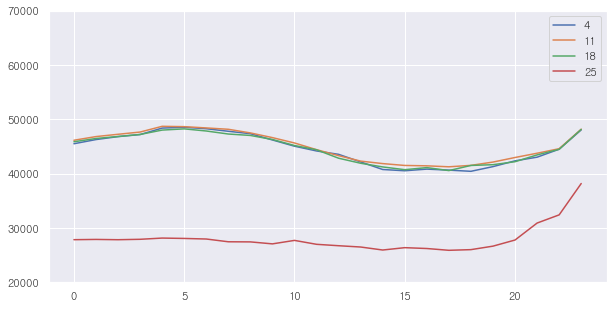

In [31]:
plt.figure(figsize=(10,5))
plt.ylim(20000,70000)

for i in range(4):
    plt_tmp = tmp[(tmp['month'] == 11) &(tmp['day'] == 4+(i*7))]  
    plt.plot(plt_tmp['hour'],plt_tmp['총생활인구수'],label=4+(i*7))

plt.legend(loc='upper right')

### 비슷한 추세인가?? 10000을 더한 후 판단해 보자

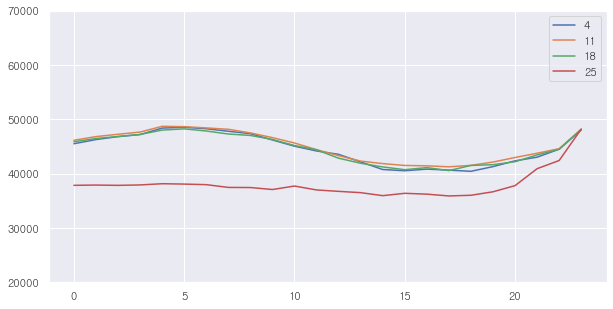

In [32]:
plt.figure(figsize=(10,5))
plt.ylim(20000,70000)

for i in range(4):
    plt_tmp = tmp[(tmp['month'] == 11) &(tmp['day'] == 4+(i*7))]  
    if (i == 3) :
        plt.plot(plt_tmp['hour'],plt_tmp['총생활인구수']+10000,label=4+(i*7))
    else :
        plt.plot(plt_tmp['hour'],plt_tmp['총생활인구수'],label=4+(i*7))

plt.legend(loc='upper right')

### 10000을 더하더라도 23시의 데이터를 제외하면 그 추세가 다르다
### 평균으로 해볼까?

In [33]:
ex_tmp = pd.DataFrame()

for k in range(24):  # 시간
    mean = 0
    for i in range(5):   # 년도
        if i != 1:
            df_tmp = df_total[(df_total['year'] == 2017 + i) 
                              & (df_total['month'] == 11)
                             & (df_total['day'] == 25)
                             & (df_total['hour'] == k)
                             ]
            mean = mean + float(df_tmp['총생활인구수'])
    mean = mean/4
    tmp1 = pd.DataFrame([[20180000+1100+25,2018,11,25,k,mean]], 
                        columns=['기준일ID','year','month','day','hour','총생활인구수'])
    ex_tmp= pd.concat([ex_tmp,tmp1],sort=False)

#ex_tmp

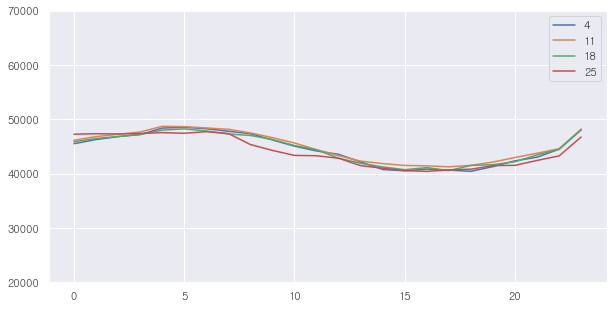

In [34]:
plt.figure(figsize=(10,5))
plt.ylim(20000,70000)

for i in range(4):
    plt_tmp = tmp[(tmp['month'] == 11) &(tmp['day'] == 4+(i*7))]  
    if (i == 3) :
        plt_tmp = ex_tmp
        plt.plot(plt_tmp['hour'],plt_tmp['총생활인구수']+4000,label=4+(i*7))
    else :
        plt.plot(plt_tmp['hour'],plt_tmp['총생활인구수'],label=4+(i*7))

plt.legend(loc='upper right')

### 평균 후 4000을 더하니 비슷한 추세가  나온다.

In [35]:
ex_tmp['총생활인구수'] = ex_tmp['총생활인구수']+4000
#ex_tmp

In [36]:
ex_tmp['기준일ID'] = ex_tmp['기준일ID'].astype('str')
ex_tmp['기준일ID'] = pd.to_datetime(ex_tmp['기준일ID'])

In [37]:
tmp = df_total[(df_total['year'] == 2018) 
               & (df_total['month'] == 11) & (df_total['day'] == 25)
              ]  
tmp

,기준일ID,year,month,day,hour,총생활인구수
16632,2018-11-25,2018,11,25,0,27838.2348
16633,2018-11-25,2018,11,25,1,27887.7643
16634,2018-11-25,2018,11,25,2,27834.7979
16635,2018-11-25,2018,11,25,3,27911.0620
16636,2018-11-25,2018,11,25,4,28135.8664
16637,2018-11-25,2018,11,25,5,28068.2962
16638,2018-11-25,2018,11,25,6,27963.1805
16639,2018-11-25,2018,11,25,7,27454.8090
16640,2018-11-25,2018,11,25,8,27433.1151
16641,2018-11-25,2018,11,25,9,27068.7996


In [38]:
# 25일 인덱스 16632~16655
for i in range (24) :
    df_total.drop(index=[16632+i],inplace=True)
df_total = pd.concat([df_total, ex_tmp],sort=False)
df_total.sort_values(['year','month','day'],inplace=True)
df_total

,기준일ID,year,month,day,hour,총생활인구수
0,2017-01-01,2017,1,1,0,43922.2281
1,2017-01-01,2017,1,1,1,43763.4929
2,2017-01-01,2017,1,1,2,43561.5708
3,2017-01-01,2017,1,1,3,43928.9929
4,2017-01-01,2017,1,1,4,44150.2973
...,...,...,...,...,...,...
43507,2021-12-31,2021,12,31,19,33304.5400
43508,2021-12-31,2021,12,31,20,33368.7201
43509,2021-12-31,2021,12,31,21,34083.1721
43510,2021-12-31,2021,12,31,22,34380.0806


### A2-3) 26일, 27일은 일정 수치를 더하여 주변 평일과 비슷한 값을 갖도록 만듦
### +) 27일 23시는 28일 0시와 비슷한 수치를 가지기에 추가 수치를 제외하는 것이 좋을 듯.

In [39]:
tmp = df_total[(df_total['year'] == 2018) 
               & (df_total['month']>= 11) & (df_total['month'] <=12)
              ]  
#tmp

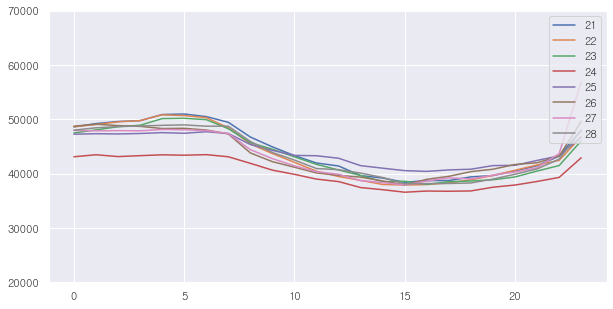

In [40]:
plt.figure(figsize=(10,5))
plt.ylim(20000,70000)

for i in range(8):
    plt_tmp = tmp[(tmp['month'] == 11) &(tmp['day'] == 21+i)]  
    if ((i == 5) | (i == 6)):
        plt.plot(plt_tmp['hour'],plt_tmp['총생활인구수']+10000,label=21+i)
    else:
        plt.plot(plt_tmp['hour'],plt_tmp['총생활인구수'],label=21+i)

plt.legend(loc='upper right')

### 10000을 더하니 비슷한 형태를 띈다.

In [41]:
ex_tmp = tmp[(tmp['month'] == 11) & ((tmp['day'] == 26) |(tmp['day'] == 27))]  
ex_tmp['총생활인구수'] = ex_tmp['총생활인구수']+10000
ex_tmp.loc[(ex_tmp['day']== 27) & (ex_tmp['hour']== 23),'총생활인구수'] = ex_tmp.loc[(ex_tmp['day']== 27) & (ex_tmp['hour']== 23),'총생활인구수']-10000
ex_tmp

,기준일ID,year,month,day,hour,총생활인구수
16656,2018-11-26,2018,11,26,0,48716.4022
16657,2018-11-26,2018,11,26,1,49082.1580
16658,2018-11-26,2018,11,26,2,48824.5709
16659,2018-11-26,2018,11,26,3,48683.1393
16660,2018-11-26,2018,11,26,4,48286.9871
16661,2018-11-26,2018,11,26,5,48329.4502
16662,2018-11-26,2018,11,26,6,48015.1397
16663,2018-11-26,2018,11,26,7,47287.6340
16664,2018-11-26,2018,11,26,8,43796.5314
16665,2018-11-26,2018,11,26,9,42189.4419


In [42]:
# 26, 27일 인덱스 16656~16703
for i in range (48):
    df_total.drop(index=[16656+i],inplace=True)
df_total = pd.concat([df_total, ex_tmp],sort=False)
df_total.sort_values(['year','month','day'],inplace=True)
df_total

,기준일ID,year,month,day,hour,총생활인구수
0,2017-01-01,2017,1,1,0,43922.2281
1,2017-01-01,2017,1,1,1,43763.4929
2,2017-01-01,2017,1,1,2,43561.5708
3,2017-01-01,2017,1,1,3,43928.9929
4,2017-01-01,2017,1,1,4,44150.2973
...,...,...,...,...,...,...
43507,2021-12-31,2021,12,31,19,33304.5400
43508,2021-12-31,2021,12,31,20,33368.7201
43509,2021-12-31,2021,12,31,21,34083.1721
43510,2021-12-31,2021,12,31,22,34380.0806


In [43]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43512 entries, 0 to 43511
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일ID   43512 non-null  datetime64[ns]
 1   year    43512 non-null  int64         
 2   month   43512 non-null  int64         
 3   day     43512 non-null  int64         
 4   hour    43512 non-null  int64         
 5   총생활인구수  43512 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 2.3 MB


### A3) 19년도 빈값 처리

In [44]:
tmp = df_total[(df_total['year'] == 2019) 
               & (df_total['month']>9) & (df_total['month']<11)
              & (df_total['day']>12) & (df_total['day']<30)
              ]  
tmp
# 2019.10.15일부터 2019.10.27일까지의 데이터가 없음.

,기준일ID,year,month,day,hour,총생활인구수
24360,2019-10-13,2019,10,13,0,44150.5894
24361,2019-10-13,2019,10,13,1,44531.0444
24362,2019-10-13,2019,10,13,2,44675.8999
24363,2019-10-13,2019,10,13,3,45140.7543
24364,2019-10-13,2019,10,13,4,45140.0742
24365,2019-10-13,2019,10,13,5,45176.9125
24366,2019-10-13,2019,10,13,6,45086.9793
24367,2019-10-13,2019,10,13,7,44797.7229
24368,2019-10-13,2019,10,13,8,44698.8360
24369,2019-10-13,2019,10,13,9,44342.4000


In [45]:
# 19.10.15 ~ 19.10.27의 결측치 처리
ex_tmp = pd.DataFrame()

for j in range(13) :  # 날짜
    for k in range(24):  # 시간
        mean = 0

        for i in range(5):   # 년도
            if i != 2:
                df_tmp = df_total[(df_total['year'] == 2017 + i) 
                                  & (df_total['month'] == 10)
                                 & (df_total['day'] == j+15)
                                 & (df_total['hour'] == k)
                                 ]
                mean = mean + float(df_tmp['총생활인구수'])
        mean = mean/4
        tmp1 = pd.DataFrame([[20190000+1000+j+15,2019,10,j+15,k,mean]], 
                            columns=['기준일ID','year','month','day','hour','총생활인구수'])
        ex_tmp= pd.concat([ex_tmp,tmp1],sort=False)

ex_tmp

,기준일ID,year,month,day,hour,총생활인구수
0,20191015,2019,10,15,0,44308.615500
0,20191015,2019,10,15,1,44468.908850
0,20191015,2019,10,15,2,44620.026850
0,20191015,2019,10,15,3,44794.796900
0,20191015,2019,10,15,4,45114.874975
...,...,...,...,...,...,...
0,20191027,2019,10,27,19,37695.097375
0,20191027,2019,10,27,20,37930.610925
0,20191027,2019,10,27,21,38563.010100
0,20191027,2019,10,27,22,39770.468350


In [46]:
ex_tmp['기준일ID'] = ex_tmp['기준일ID'].astype('str')
ex_tmp['기준일ID'] = pd.to_datetime(ex_tmp['기준일ID'])
#ex_tmp

In [47]:
df_total = pd.concat([df_total, ex_tmp],sort=False)
df_total.sort_values(['year','month','day'],inplace=True)

df_total

,기준일ID,year,month,day,hour,총생활인구수
0,2017-01-01,2017,1,1,0,43922.2281
1,2017-01-01,2017,1,1,1,43763.4929
2,2017-01-01,2017,1,1,2,43561.5708
3,2017-01-01,2017,1,1,3,43928.9929
4,2017-01-01,2017,1,1,4,44150.2973
...,...,...,...,...,...,...
43507,2021-12-31,2021,12,31,19,33304.5400
43508,2021-12-31,2021,12,31,20,33368.7201
43509,2021-12-31,2021,12,31,21,34083.1721
43510,2021-12-31,2021,12,31,22,34380.0806


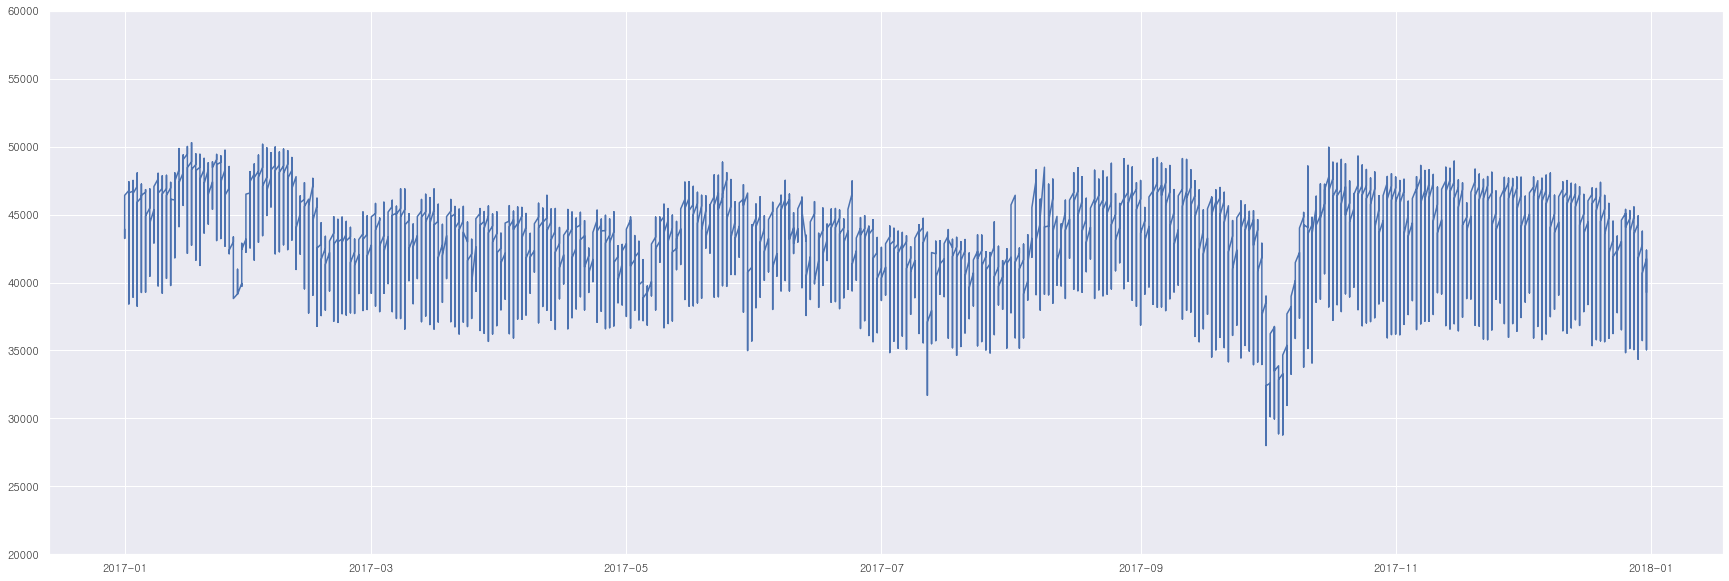

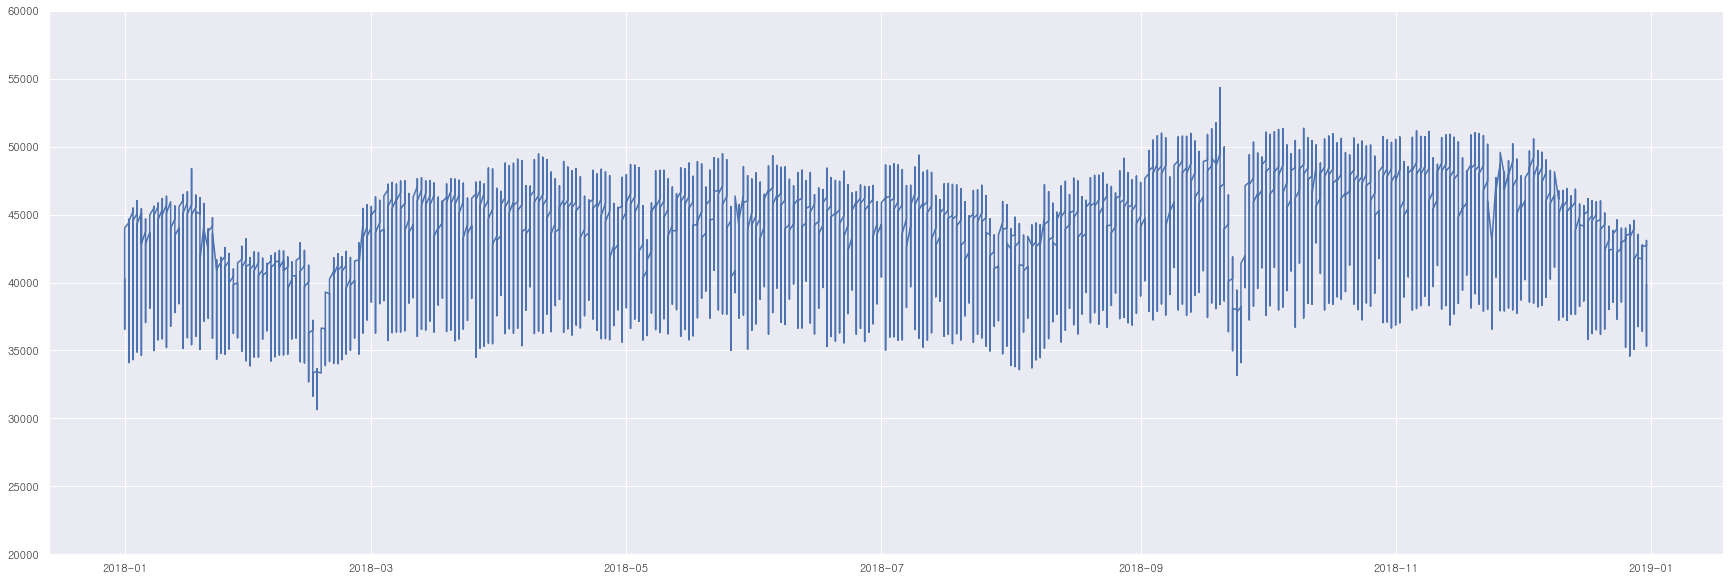

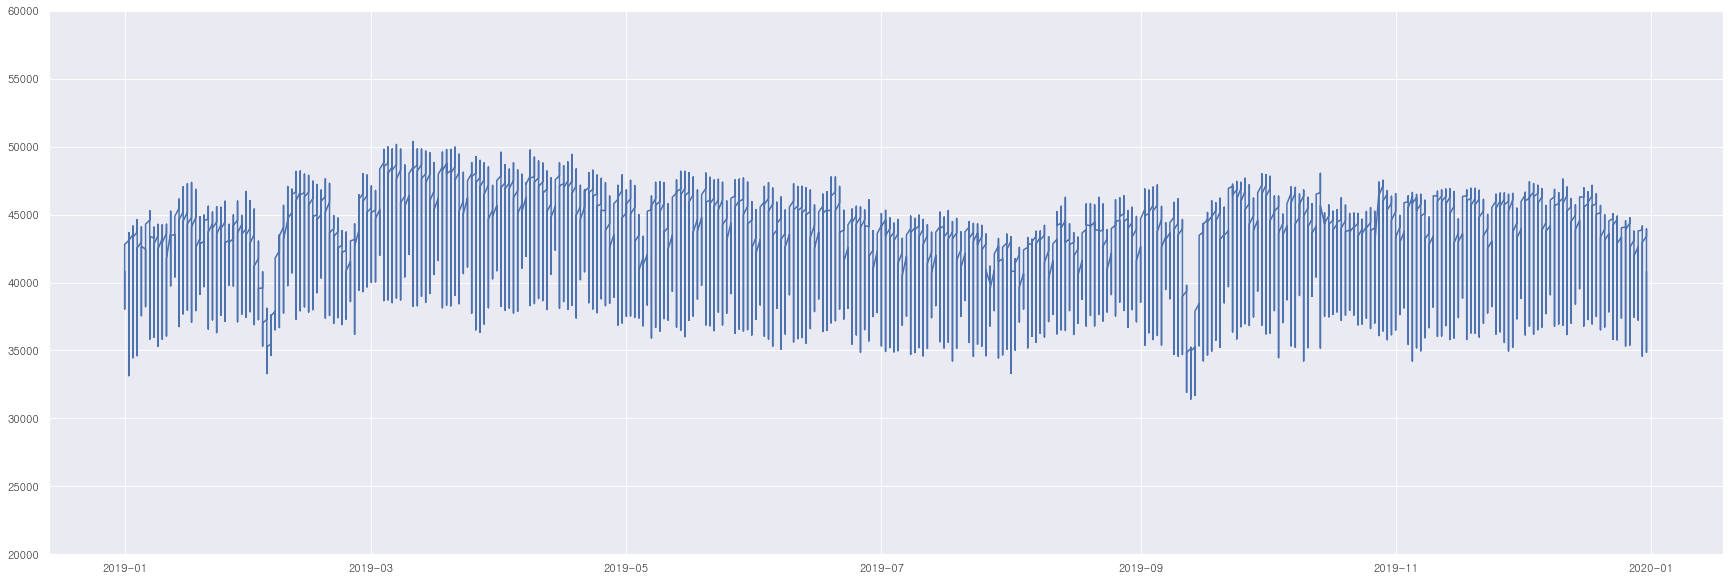

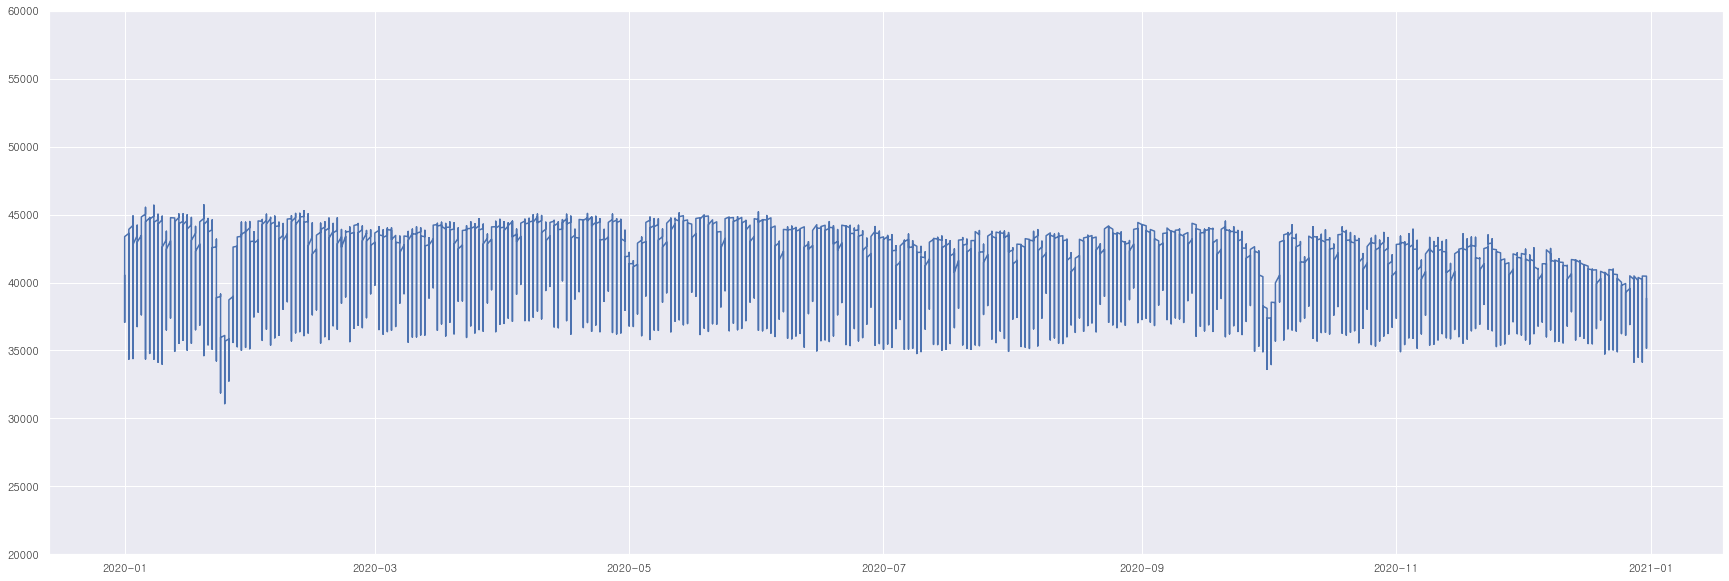

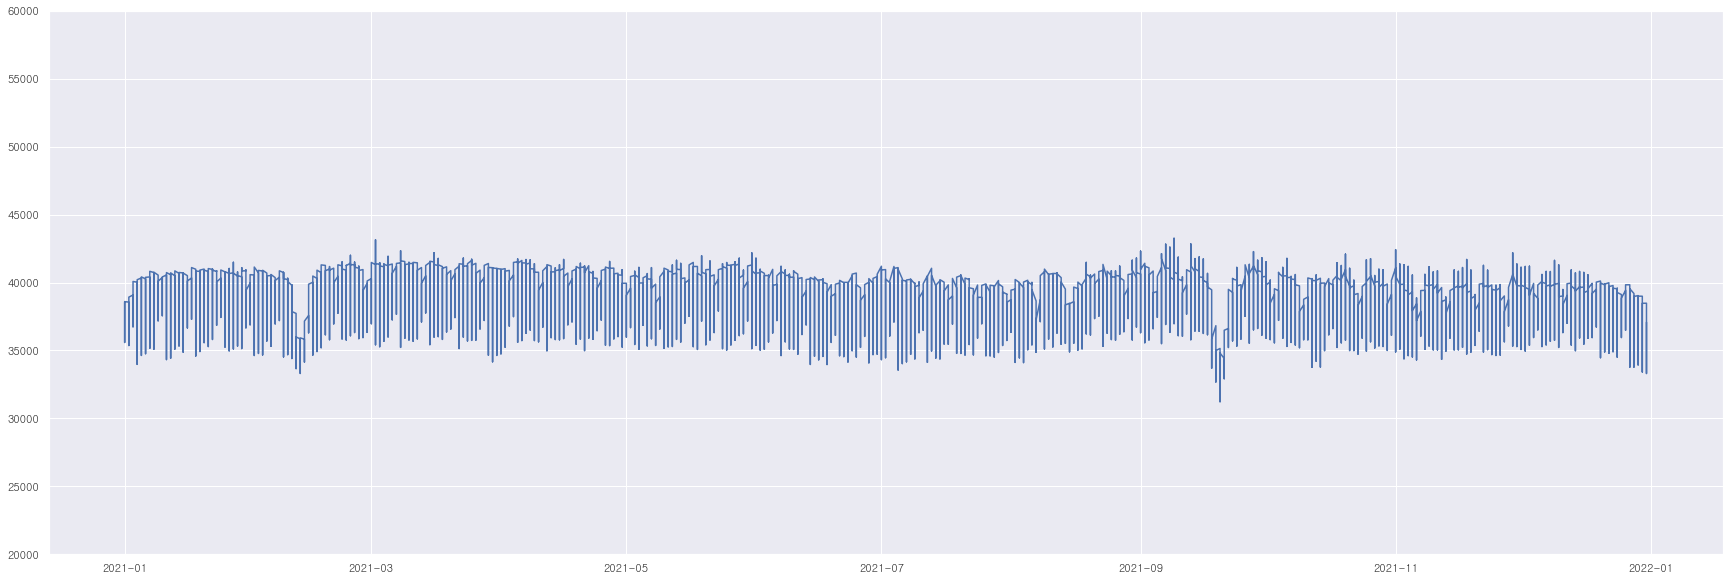

In [48]:
for i in range(5):
    tmp = df_total[(df_total['year'] < 2018 + i) & (df_total['year'] > 2016 + i)]  
    plt.figure(figsize=(30,10))
    plt.ylim(20000,60000)
    plt.plot(tmp['기준일ID'],tmp['총생활인구수'])

## 2020.02.29 데이터로 인해 규칙성이 사라져 일단 제외하고 학습?

In [49]:
# df_total[(df_total['year']==2020)
#         & (df_total['month'] == 2)
#          & (df_total['day'] == 29)]

In [50]:
# 27384 ~ 27407
# for i in range(24):
#     df_total.drop(index=[16656+i],inplace=True)

# df_total.reset_index(drop=True, inplace=True)
# df_total

---
# Train data & Test data 처리

In [51]:
#df_total = df_total[(df_total['year'] >= 2020)]  # ~2019 제외하고 학습?
mod_df = df_total.copy().drop(['기준일ID','year', 'month', 'day', 'hour'], axis=1)


mod_df['2m'] = df_total['총생활인구수'].shift(24*59)
mod_df['1y'] = df_total['총생활인구수'].shift(24*365)
mod_df['2mRm'] = df_total['총생활인구수'].shift(24*59).rolling(window=7).mean()
mod_df['1yRm'] = df_total['총생활인구수'].shift(24*365).rolling(window=7).mean()

mod_df['2m4d'] = df_total['총생활인구수'].shift(24*(59+4))  # 7*9 = 63   //  63-59 = 4
# mod_df['1y6d'] = df_total['총생활인구수'].shift(24*371)  # 7*53 = 371   //  371-365 = 6
#mod_df['2m1d'] = df_total['총생활인구수'].shift(1416+24)
#mod_df['2m7d'] = df_total['총생활인구수'].shift(1416+24*7)

In [52]:
mod_df

,총생활인구수,2m,1y,2mRm,1yRm,2m4d
0,43922.2281,NaN,NaN,NaN,NaN,NaN
1,43763.4929,NaN,NaN,NaN,NaN,NaN
2,43561.5708,NaN,NaN,NaN,NaN,NaN
3,43928.9929,NaN,NaN,NaN,NaN,NaN
4,44150.2973,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
43507,33304.5400,35708.4819,35853.1225,35562.269243,35500.637300,35901.7349
43508,33368.7201,35924.7026,35858.2279,35515.508186,35536.194586,35450.9706
43509,34083.1721,36597.7205,36417.7858,35577.557943,35683.430829,35869.6831
43510,34380.0806,37163.4665,36217.4906,35873.280786,35834.474600,36629.8721


In [53]:
mod_df.dropna(inplace=True)

In [54]:
train_x = mod_df.iloc[ :,1:] # 조건들~
train_x = train_x.values
train_y = mod_df.iloc[ :,:1] # 총생활인구수만
train_y = train_y.values

In [55]:
test_x = pd.DataFrame()

### 2021년 shift data

In [56]:
tmp21 = df_total[(df_total['year'] == 2021)]
tmp21

,기준일ID,year,month,day,hour,총생활인구수
34752,2021-01-01,2021,1,1,0,38538.5993
34753,2021-01-01,2021,1,1,1,38457.1528
34754,2021-01-01,2021,1,1,2,38185.1451
34755,2021-01-01,2021,1,1,3,38074.2836
34756,2021-01-01,2021,1,1,4,38229.0027
...,...,...,...,...,...,...
43507,2021-12-31,2021,12,31,19,33304.5400
43508,2021-12-31,2021,12,31,20,33368.7201
43509,2021-12-31,2021,12,31,21,34083.1721
43510,2021-12-31,2021,12,31,22,34380.0806


In [57]:
test_f1 = pd.DataFrame()
test_f1['2m']= tmp21[(tmp21['month'] >= 11)]['총생활인구수']
test_f1.reset_index(drop=True,inplace=True)

test_f2 = pd.DataFrame()
test_f2['1y'] = tmp21[(tmp21['month'] <= 2)]['총생활인구수']
test_f2.reset_index(drop=True,inplace=True)

In [58]:
test_x = pd.concat([test_f1,test_f2],axis=1,join='inner')
#test_x = test_x.values
test_x

,2m,1y
0,41075.7126,38538.5993
1,40723.4197,38457.1528
2,40734.4965,38185.1451
3,40701.1690,38074.2836
4,40678.9959,38229.0027
...,...,...
1411,34478.8443,36466.6586
1412,35128.7653,36795.4254
1413,35839.3935,37333.9824
1414,36116.1812,37630.8536


### 2021년 rolling data

In [59]:
tmp_rolling = pd.concat([df_total[(df_total['year'] == 2020) & (df_total['month'] >= 11)],tmp21])
tmp_rolling['Rm'] = tmp_rolling['총생활인구수'].rolling(window=7).mean()
tmp_rolling = tmp_rolling[(tmp_rolling['year'] == 2021)]
tmp_rolling

,기준일ID,year,month,day,hour,총생활인구수,Rm
34752,2021-01-01,2021,1,1,0,38538.5993,36741.985171
34753,2021-01-01,2021,1,1,1,38457.1528,37169.697014
34754,2021-01-01,2021,1,1,2,38185.1451,37502.843100
34755,2021-01-01,2021,1,1,3,38074.2836,37819.422486
34756,2021-01-01,2021,1,1,4,38229.0027,38078.167757
...,...,...,...,...,...,...,...
43507,2021-12-31,2021,12,31,19,33304.5400,34045.840357
43508,2021-12-31,2021,12,31,20,33368.7201,33864.107414
43509,2021-12-31,2021,12,31,21,34083.1721,33805.180857
43510,2021-12-31,2021,12,31,22,34380.0806,33825.764271


In [60]:
test_f1 = pd.DataFrame()
test_f1['2mRm']= tmp_rolling[(tmp_rolling['month'] >= 11)]['Rm']
test_f1.reset_index(drop=True,inplace=True)

test_f2 = pd.DataFrame()
test_f2['1yRm'] = tmp_rolling[(tmp_rolling['month'] <= 2)]['Rm']
test_f2.reset_index(drop=True,inplace=True)

In [61]:
test_x = pd.concat([test_x,test_f1],axis=1,join='inner')
test_x = pd.concat([test_x, test_f2],axis=1,join='inner')


In [62]:
j = 24*4 # 2m4d전
tmp_2m4d = df_total.loc[43511-1415-j:43511-j]
tmp_2m4d

test_f1 = pd.DataFrame()
test_f1['2m4d']= tmp_2m4d['총생활인구수']
test_f1.reset_index(drop=True,inplace=True)

In [63]:
test_x = pd.concat([test_x,test_f1],axis=1,join='inner')
test_x = test_x.values
test_x

array([[41075.7126    , 38538.5993    , 37583.00081429, 36741.98517143,
        39890.8588    ],
       [40723.4197    , 38457.1528    , 38219.95027143, 37169.69701429,
        39692.6632    ],
       [40734.4965    , 38185.1451    , 38879.64882857, 37502.8431    ,
        39545.9509    ],
       ...,
       [35839.3935    , 37333.9824    , 34640.14794286, 36790.01702857,
        36038.6967    ],
       [36116.1812    , 37630.8536    , 34942.5083    , 36791.08065714,
        36422.1194    ],
       [38996.5994    , 40114.2226    , 35665.61484286, 37327.10092857,
        39545.2765    ]])

---
# 모델

In [64]:
import xgboost

xgb_reg = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb_reg.fit(train_x, train_y)
y_pred_xgb = xgb_reg.predict(test_x)

In [65]:
# 기존 최고점수 데이터랑 비교해보기
best = pd.read_csv('competitions/best_score.csv')

best

,id,count
0,0,37520.290
1,1,37293.785
2,2,37312.383
3,3,37022.285
4,4,36725.990
...,...,...
1411,1411,37133.008
1412,1412,36953.790
1413,1413,36876.867
1414,1414,36834.977


In [66]:
# 다른 해 1~2월 데이터랑 비교
com = df_total.loc[(df_total['year'] == 2021) & (df_total['month'] <= 2)]['총생활인구수']
com = com.values
com = pd.DataFrame({'id':range(0,1416), 'count':com})

In [67]:
# 값 조절
res = pd.DataFrame({'id':range(0,1416), 'count':y_pred_xgb})

#res.loc[672:791]['count'] = res.loc[672:791]['count'] - 3000

res.loc[672:776]['count'] = res.loc[672:776]['count'] - 2000

res.loc[695:780]['count'] = res.loc[695:780]['count'] - 2000  # 706

res.loc[719:752]['count'] = res.loc[719:752]['count'] - 1000 
#res.loc[696+k:706+k]['count'] = res.loc[696+k:706+k]['count'] - 2500
# res.loc[680:789]['count'] = res.loc[680:789]['count'] - 3000
# res.loc[718:752]['count'] = res.loc[718:752]['count'] - 1500
res.loc[0:47]['count'] = res.loc[0:47]['count'] - 1700

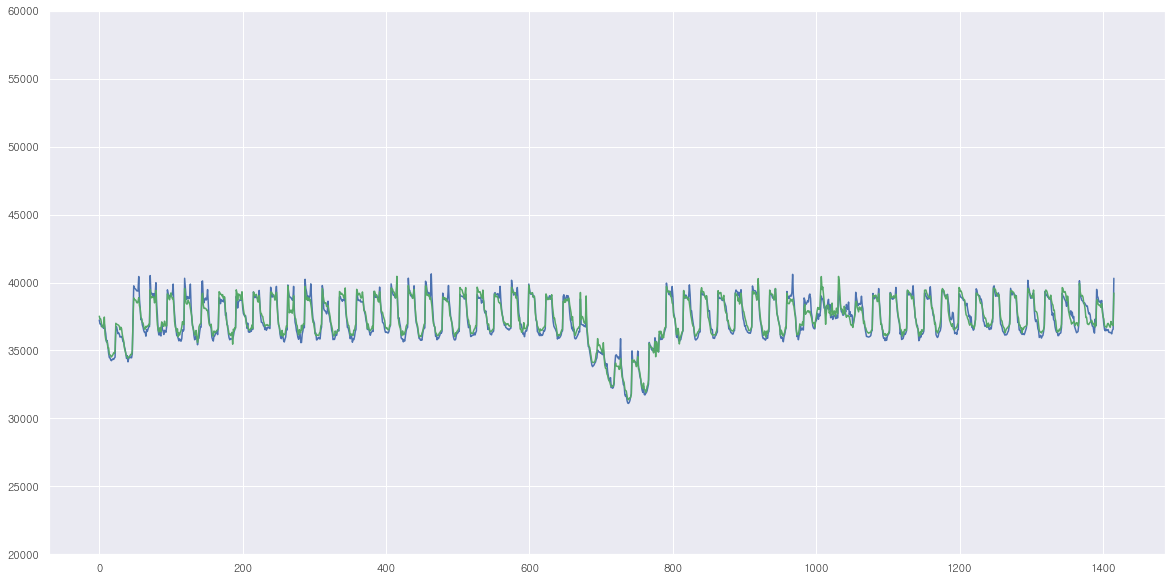

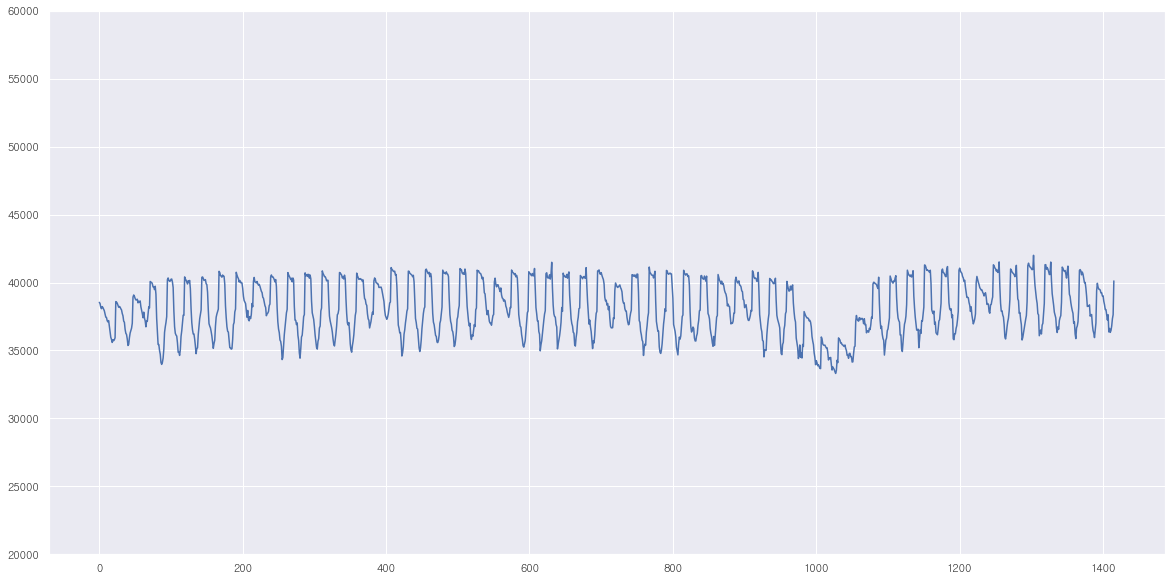

In [68]:
plt.figure(figsize=(20,10))
plt.ylim(20000,60000)
#plt.xlim(670,850)

plt.plot(res['count'])
#plt.plot(res.loc[672:791]['count'],'r')
plt.plot(best['count'],'g')

plt.figure(figsize=(20,10))
plt.ylim(20000,60000)
plt.plot(com['count'])


In [69]:
ck = pd.DataFrame()
ck['count'] = abs(best['count'] - res['count'])

ck

,count
0,283.262656
1,349.163906
2,346.000188
3,261.210781
4,133.560781
...,...
1411,810.414250
1412,730.575156
1413,384.382625
1414,274.152781


In [70]:
ck.mean()

count    320.992162
dtype: float64

In [71]:
res.to_csv('competitions/result.csv', index=False)